In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/titanic_dataset.csv')

In [22]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#imputation:
df.isnull().sum()
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())


In [25]:
#handling oulier:
#1 z_score
def z_score(data):
  mean=np.mean(data)
  std_dev=np.std(data)
  score=(data-mean)/std_dev
  return score

In [26]:
a=z_score(df['Age'])

In [27]:
outliers = [data_point for data_point, \
          a in zip(df, a) if a > 2]
print(f'\nThe outliers in the dataset is {outliers}')



The outliers in the dataset is ['Embarked']


In [28]:
#Interquartile Range (IQR)Interquartile Range (IQR)
df['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


<Axes: ylabel='Age'>

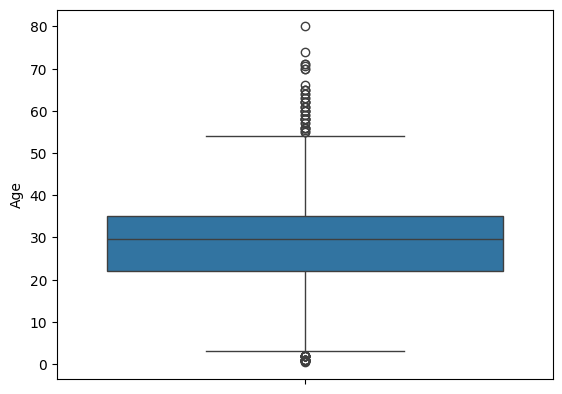

In [29]:
sns.boxplot(df['Age'])

<ipython-input-30-4b4c095c0502>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=15,kde=False)


<Axes: xlabel='Age'>

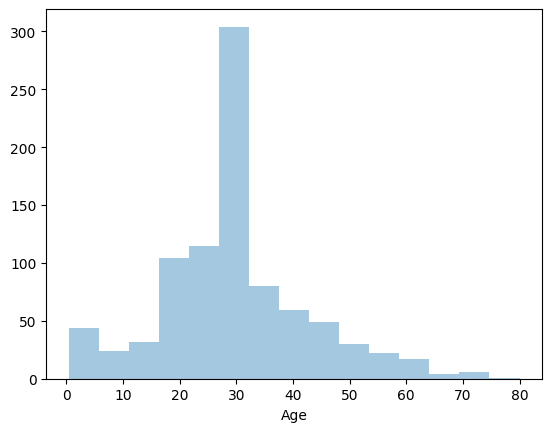

In [30]:
sns.distplot(df['Age'],bins=15,kde=False)
#https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

In [31]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)

In [32]:
IQR=Q3-Q1

In [33]:
low_limit=Q1-1.5*IQR

In [43]:
uper_limit=Q3-1.5*IQR

In [44]:
#Any data outside lower/uper limit is outlier
lwr_out=df['Age']<low_limit
upr_out=df['Age']>uper_limit

In [45]:
df['Age'][(lwr_out|upr_out)]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [46]:
#binning
A=df['Age']
bins=[0,10,20,30,40,50,60,70,80]
df['Age_bins']=pd.cut(df['Age'],bins)

In [48]:
df[['Age_bins','Age']]

,Age_bins,Age
0,"(20, 30]",22.000000
1,"(30, 40]",38.000000
2,"(20, 30]",26.000000
3,"(30, 40]",35.000000
4,"(30, 40]",35.000000
...,...,...
886,"(20, 30]",27.000000
887,"(10, 20]",19.000000
888,"(20, 30]",29.699118
889,"(20, 30]",26.000000


In [34]:
cat_col=df.select_dtypes(include='int64')
ob_col=df.select_dtypes(include='object')

In [35]:
#Feature_scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc=StandardScaler()
mns=MinMaxScaler()

In [36]:
df=df[['Pclass','Age','Survived','Fare']]

In [37]:
a=sc.fit_transform(df)
b=mns.fit_transform(df)

In [38]:
a

array([[ 0.82737724, -0.5924806 , -0.78927234, -0.50244517],
       [-1.56610693,  0.63878901,  1.2669898 ,  0.78684529],
       [ 0.82737724, -0.2846632 ,  1.2669898 , -0.48885426],
       ...,
       [ 0.82737724,  0.        , -0.78927234, -0.17626324],
       [-1.56610693, -0.2846632 ,  1.2669898 , -0.04438104],
       [ 0.82737724,  0.17706291, -0.78927234, -0.49237783]])

In [39]:
std_scaled_df1=pd.DataFrame(data=a,columns=df.columns)

In [40]:
min_scaled_df2=pd.DataFrame(data=b,columns=df.columns)

In [41]:
#feature_encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [42]:
ohe=OneHotEncoder()
df=ohe.fit_transform(df[['Pclass','Sex']])

KeyError: "['Sex'] not in index"

In [ ]:
one=LabelEncoder()
df['Embarked']=one.fit_transform(df['Embarked'])

In [ ]:
df